# CUSTOMER SORTING BY K-MEANS AND HEIRARCICHAL CLUSTERING

### Changing the directory of Notebook

In [1]:
cd C:\Users\pooja\Downloads\MLProjects 

C:\Users\pooja\Downloads\MLProjects


### Import required libraries for clustering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import plotly.express as px


import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
#from scipy.cluster.hierarchy import linkage
#from scipy.cluster.hierarchy import dendrogram
#from scipy.cluster.hierarchy import cut_tree
# to remove warnings
import warnings 
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df=pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
df=df.dropna()

In [8]:
df.shape

(406829, 8)

In [10]:
# to check if data is of one country or multiple countries
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [9]:
#CHANGING THE DATATYPE OF CUSTOMER ID AS PER THE BUSINESS REQUIREMENT as it uniquely identifies id's and may contain characters
df['CustomerID']=df['CustomerID'].astype(str)

### FEATURE ENGINEERING

In [10]:
df['Amount']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
# This step groups the data in the retail DataFrame by the 'CustomerID' column 
# to calculates the sum of the 'Amount' column for each customer. 
df1 = df.groupby('CustomerID')['Amount'].sum().reset_index()
df1

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [12]:
# New Attribute : Frequency
# count the number of unique invoice numbers for each customer
df2 = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df2.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
df2.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df2.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
# Merging the two dfs

dfm = df1.merge(df2, on='CustomerID')
# another way 
# rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
dfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
# calculate the time difference between the maximum date in the dataset and the transaction date for each record

df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
# Compute last transaction date to get the recency of customers 
# As each customer may have multiple invonces that has been purchased 
# So we need to create a indicator that tells us when he made the last transaction to find whether he is active or not
df3= df.groupby('CustomerID')['Diff'].min().reset_index()
df3.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [18]:
# Extract number of days only

df3['Diff'] = df3['Diff'].dt.days
df3.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [19]:
# Merge tha dataframes to get the final RFM dataframe

dfm = dfm.merge(df3, on='CustomerID')

dfm.rename(columns={'Diff': 'Recency'}, inplace=True)
dfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [20]:
dfm.shape

(4372, 4)

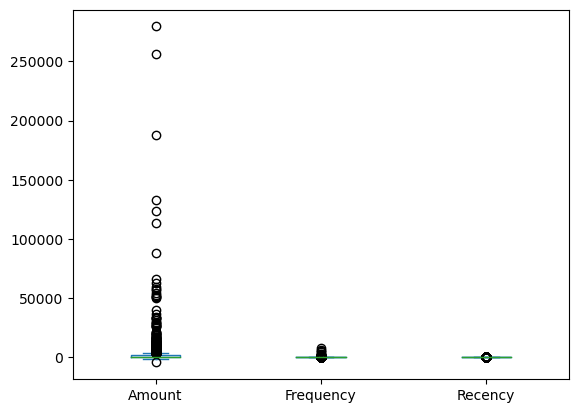

In [21]:
dfm.plot(kind='box')
plt.show()   #WE CAN SEE OUTLIERS FROM THIS BOXPLOT

In [22]:
# Removing (statistical) outliers for Amount
Q1 = dfm.Amount.quantile(0.10)
Q3 = dfm.Amount.quantile(0.90)
IQR = Q3 - Q1
dfm = dfm[(dfm.Amount >= Q1 - 1.5*IQR) & (dfm.Amount <= Q3 + 1.5*IQR)]



# Removing (statistical) outliers for Recency
Q1 = dfm.Recency.quantile(0.10)
Q3 = dfm.Recency.quantile(0.90)
IQR = Q3 - Q1
dfm = dfm[(dfm.Recency >= Q1 - 1.5*IQR) & (dfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = dfm.Frequency.quantile(0.10)
Q3 = dfm.Frequency.quantile(0.90)
IQR = Q3 - Q1
dfm = dfm[(dfm.Frequency >= Q1 - 1.5*IQR) & (dfm.Frequency <= Q3 + 1.5*IQR)]

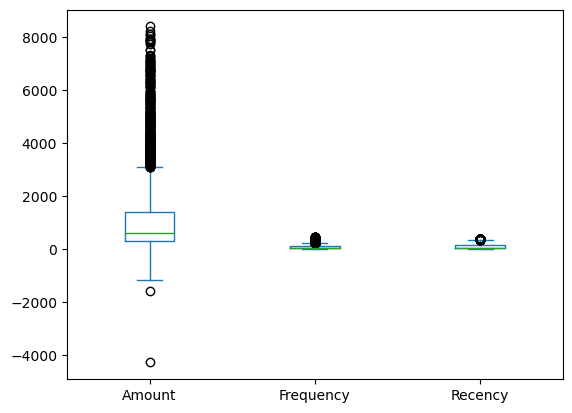

In [23]:
#AFTER REMOVAL OF OUTLIERS
dfm.plot(kind='box')
plt.show() 

In [24]:
dfm.describe()  #SINCE STD IS EQUAL OR LESS THAN MEAN SO THERE ARE LESS OUTLIERS

,Amount,Frequency,Recency
count,4189.000000,4189.000000,4189.000000
mean,1110.920872,68.650752,94.462163
std,1334.511999,78.940589,101.420686
min,-4287.630000,1.000000,0.000000
25%,280.550000,16.000000,18.000000
50%,611.880000,39.000000,51.000000
75%,1407.730000,91.000000,149.000000
max,8393.220000,459.000000,373.000000


In [25]:
# Rescaling the attributes

dfm = dfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
dfm_scaled = scaler.fit_transform(dfm)
dfm_scaled.shape

(4189, 3)

In [26]:
dfm_scaled = pd.DataFrame(dfm_scaled)
dfm_scaled.columns = ['Amount', 'Frequency', 'Recency']
dfm_scaled.head()

,Amount,Frequency,Recency
0,-0.832554,-0.844416,2.273356
1,2.397476,1.436052,-0.921640
2,0.514346,-0.477007,-0.201779
3,0.484601,0.055102,-0.754001
4,-0.581946,-0.654377,2.115579


### BUILDING THE MODEL

In [65]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dfm_scaled)

KMeans(max_iter=50, n_clusters=4)

For n_clusters=2, the Elbow score is 8733.78745730808
For n_clusters=3, the Elbow score is 4158.571257729446
For n_clusters=4, the Elbow score is 3436.6234727583574
For n_clusters=5, the Elbow score is 2822.7786042918633
For n_clusters=6, the Elbow score is 2431.107044160496
For n_clusters=7, the Elbow score is 2101.1057408618835
For n_clusters=8, the Elbow score is 1868.1994202259039


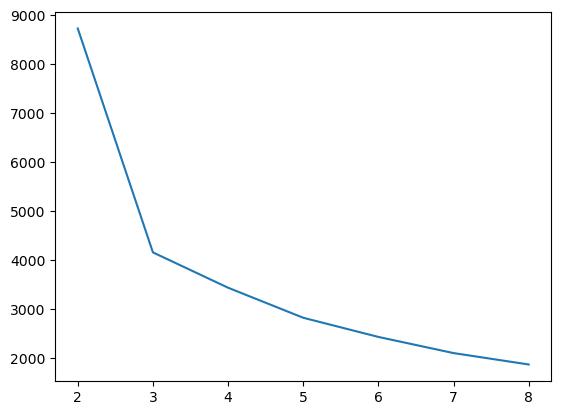

In [66]:
#A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data
#may be clustered.The Elbow Method is one of the most popular methods to determine this optimal value of k.¶

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfm_scaled)
    
    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

plt.plot(range_n_clusters,ssd)
plt.show()


In [59]:
ssd

[2397374970.872772,
 1169650577.6661038,
 689149263.2164435,
 479124879.86787516,
 362337536.9315543,
 281186604.56857467,
 232746210.30910236]

In [67]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5798713979213225
For n_clusters=3, the silhouette score is 0.599832961816149
For n_clusters=4, the silhouette score is 0.5890727551333683
For n_clusters=5, the silhouette score is 0.4509725660694086
For n_clusters=6, the silhouette score is 0.44867940861005456
For n_clusters=7, the silhouette score is 0.41036943648105
For n_clusters=8, the silhouette score is 0.41375871789027324


In [74]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(dfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [75]:
y_predicted = kmeans.fit_predict(dfm_scaled)
y_predicted

array([0, 2, 1, ..., 0, 1, 1])

In [76]:
dfm_scaled['cluster']=y_predicted
dfm_scaled.head()

,Amount,Frequency,Recency,cluster,clusterDB
0,-0.832554,-0.844416,2.273356,0,2
1,2.397476,1.436052,-0.921640,2,0
2,0.514346,-0.477007,-0.201779,1,1
3,0.484601,0.055102,-0.754001,1,1
4,-0.581946,-0.654377,2.115579,0,2


In [77]:
score = silhouette_score(dfm_scaled, y_predicted)
score

0.5815923465881733

In [29]:
#DBSCAN ALGORITHM FOR CLUSTERING

In [35]:
dbscan =DBSCAN()

In [36]:
dbscan.fit(dfm_scaled)

DBSCAN()

In [37]:
y_predicted = kmeans.fit_predict(dfm_scaled)
y_predicted

array([2, 0, 1, ..., 2, 1, 1])

In [38]:
dfm_scaled['clusterDB']=y_predicted
dfm_scaled.head()

,Amount,Frequency,Recency,cluster,clusterDB
0,-0.832554,-0.844416,2.273356,2,2
1,2.397476,1.436052,-0.921640,1,0
2,0.514346,-0.477007,-0.201779,0,1
3,0.484601,0.055102,-0.754001,0,1
4,-0.581946,-0.654377,2.115579,2,2


In [39]:
score = silhouette_score(dfm_scaled, y_predicted)
score

0.6294514755703301

### Hierarichal Clustering

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
hc = AgglomerativeClustering(n_clusters = 3,  linkage = "average")
cluster = hc.fit_predict(dfm)

In [43]:
from sklearn.metrics import silhouette_score

In [54]:
score_agg = silhouette_score(dfm, cluster)
score_agg

0.7373599971285509

In [78]:
dfm['label']=cluster
dfm.head()

,Amount,Frequency,Recency,label
0,0.00,2,325,0
1,4310.00,182,1,0
2,1797.24,31,74,0
3,1757.55,73,18,0
4,334.40,17,309,0


In [79]:
dfm.label.value_counts()

0    4123
1      65
2       1
Name: label, dtype: int64

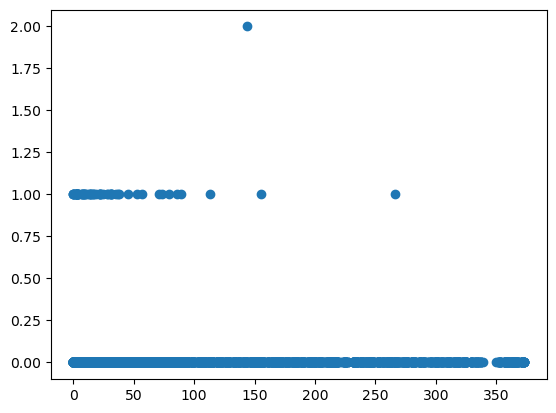

In [88]:
plt.scatter(dfm['Recency'],dfm['label'])
plt.show()

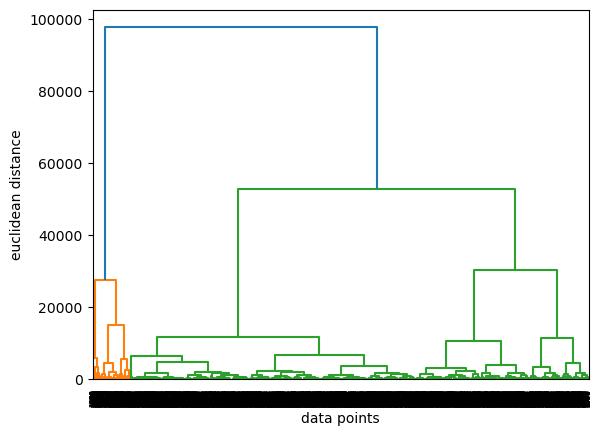

In [84]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(dfm, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()